In [71]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
%matplotlib inline
%autoreload 1

In [73]:
import pickle
import numpy as np
from functools import partial

from pathlib import Path

import matplotlib.pyplot as plt
import numpy.typing as npt

from tqdm.auto import tqdm
from tqdm.contrib.concurrent import process_map

%aimport util
from plot_helper import *

from numpy.random import default_rng
rng = default_rng()



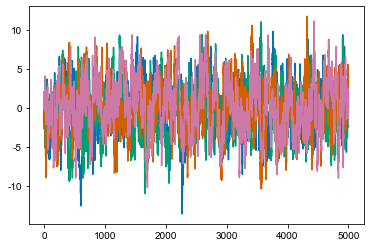

In [131]:
Q = 2
P = 2
T = 5000
y = np.zeros((P, Q,T,))
autocorr = 0.95
for p in range(P):
    for q in range(Q):
        for i in range(1,T):
            y[p,q][i] = autocorr * y[p,q][i-1] + rng.standard_normal()
                
for p in range(P):
    for q in range(Q):
        plt.plot(range(T), y[p,q])

In [121]:
print(y.shape)

(2, 2, 1000)


Text(0, 0.5, 'SEM')

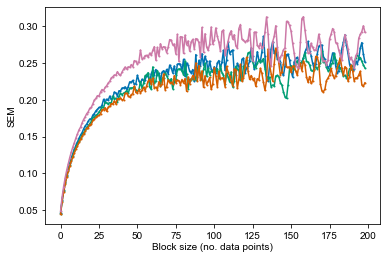

In [132]:
from scipy import stats
from skimage.measure import block_reduce
import matplotlib.pyplot as plt

blocked_sem = np.empty((P, Q))
for p in range(P):
    for q in range(Q):
        blocked_sem = [stats.sem(block_reduce(y[p, q], (i,), func=np.mean)) for i in range(1,200)]
        plt.plot(blocked_sem, '-o')
plt.xlabel('Block size (no. data points)')
plt.ylabel('SEM')

In [140]:
func = partial(stats.sem, ddof=1)
bvar = util.nd_block_average(y, func=func, axis=2, blocks=np.arange(1,200,1))
print(bvar.shape)

(2, 2, 199)


Text(0, 0.5, 'SEM')

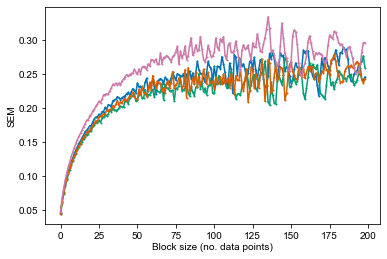

In [141]:
for p in range(P):
    for q in range(Q):
        plt.plot(bvar[p, q],  '-o')
plt.xlabel('Block size (no. data points)')
plt.ylabel('SEM')

In [138]:
print(bvar.T.shape)

(2, 2, 199)
